This is Frank's notebook for extracting the maxima across all sweeps.

Imports...

In [61]:
import os
import pickle
import numpy.ma as ma
import numpy as np
import pyart
import matplotlib.pyplot as plt
import pyart.core.grid as Grid
from pyart.core.radar import Radar
import pyart.map.gates_to_grid
# from .gates_to_grid import map_gates_to_grid

from datetime import datetime, timedelta

choose a file, read the file, mask those with less than 20dbz, and replace them with 0.

In [62]:
uf_files = [x for x in os.listdir(os.getcwd()) if x.endswith('.uf')]
the_file = uf_files[2]
print(f"Using {the_file}")
radar = pyart.io.read(the_file)
radar.fields['corrected_reflectivity']['data'] = np.ma.masked_less(radar.fields['corrected_reflectivity']['data'],20) #mask radar values less than 20 dbz
radar.fields['corrected_reflectivity']['data'] = radar.fields['corrected_reflectivity']['data'].filled(0)
# radar.info()

Using 20190731113203.uf


Plot sweep = 0, Polar

Text(0.5, 1.0, 'Sweep=0, Polar')

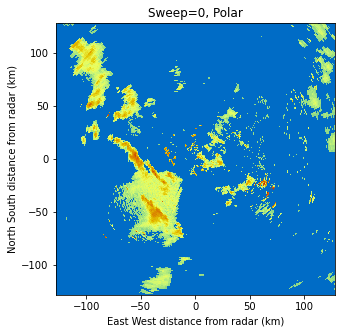

In [72]:
display = pyart.graph.RadarDisplay(radar)
fig, ax = plt.subplots(ncols=1,figsize=(5,5))
display.plot('corrected_reflectivity',edges=True,sweep=0,vmin=0,mask_outside=True,colorbar_flag=False,title_flag=False)
display.set_limits(xlim=(-128, 128), ylim=(-128, 128))
plt.title("Sweep=0, Polar")

Plot sweep = 1, Polar

Text(0.5, 1.0, 'Sweep=1, Polar')

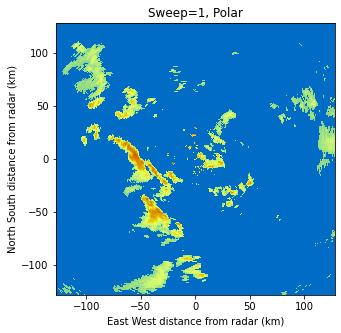

In [71]:
display = pyart.graph.RadarDisplay(radar)
fig, ax = plt.subplots(ncols=1,figsize=(5,5))
display.plot('corrected_reflectivity',edges=True,sweep=1,vmin=0,mask_outside=True,colorbar_flag=False,title_flag=False)
display.set_limits(xlim=(-128, 128), ylim=(-128, 128))
plt.title("Sweep=1, Polar")

Plot cartesian of sweep=0

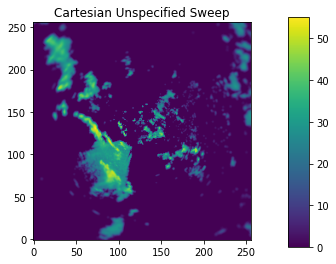

In [73]:
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_transition()
gatefilter.exclude_masked('corrected_reflectivity')

grid = pyart.map.grid_from_radars(radar,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])

fig, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("Cartesian Unspecified Sweep")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

Start of Solutions

Plot of max of Cartesian.

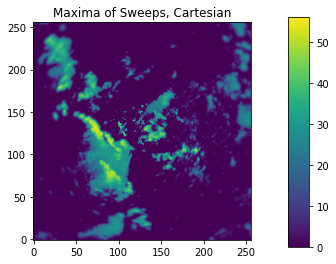

In [75]:
#element-wise maximum array
base = radar.extract_sweeps([0])
base_grid = pyart.map.grid_from_radars(base,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])

#helper function
def transform_to_grid(alt):
    sweep = radar.extract_sweeps([0])
    sweep_data = radar.extract_sweeps([alt]).fields['corrected_reflectivity']['data']
    sweep_azi = radar.extract_sweeps([alt]).azimuth['data']
    sweep.fields['corrected_reflectivity']['data'] = sweep_data
    sweep.azimuth['data'] = sweep_azi

    grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
    
    return grid.fields['corrected_reflectivity']['data']

#extract sweeps
max_arr = np.zeros((256,256))

#radar.nsweeps
for i in range(radar.nsweeps):
    sweep = transform_to_grid(i)
    max_arr = np.maximum(max_arr,sweep)

base_grid.fields['corrected_reflectivity']['data'] = max_arr

fig, ax = plt.subplots()
im = ax.imshow(base_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("Maxima of Sweeps, Cartesian")
#im = ax.imshow(max_arr[0],origin='lower')
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')

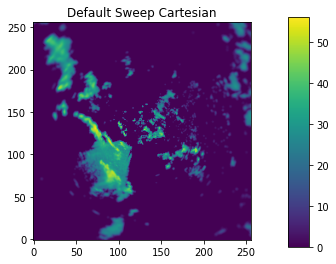

In [76]:
#Sample for sweep0
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([0]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([0]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])

fig, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("Default Sweep Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

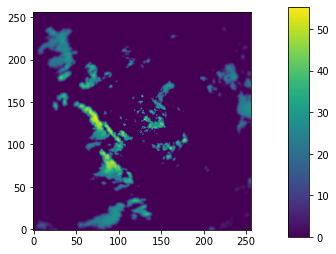

In [35]:
#Sample for sweep1
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([1]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([1]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])

fig, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

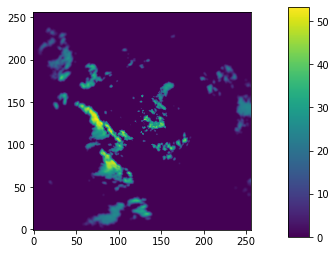

In [36]:
#Sample for sweep2
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([2]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([2]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])

fig, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

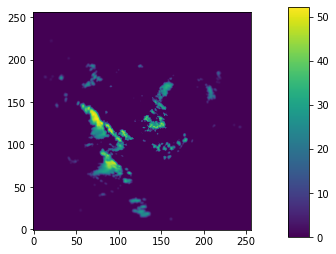

In [37]:
#Sample for sweep3
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([3]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([3]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])

fig, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

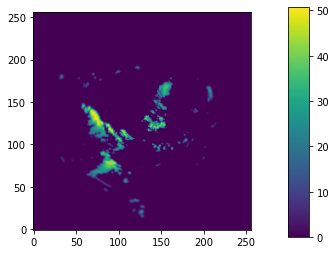

In [38]:
#Sample for sweep4
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([4]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([4]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])

fig, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

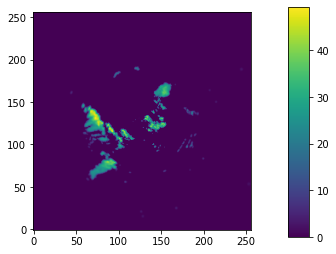

In [39]:
#Sample for sweep5
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([5]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([5]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])

fig, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

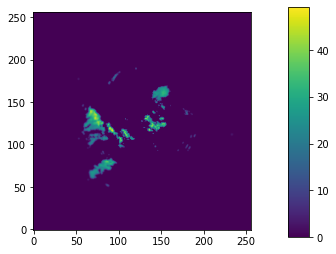

In [40]:
#Sample for sweep6
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([6]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([6]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])

fig, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()